In [45]:
import networkx as nx
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import csv
from pprint import pprint
from itertools import combinations 

In [37]:
path = "416a-final/Fall2016.csv"
people = {
    
}
courses = {}
with open(path) as f:
    print(f.readline())
    for line in f.readlines():
        crsdept,crsno,crssec,ExamCode,ExamDesc,ExamStart,ExamEnd,BlindID = line.strip('\n').split(',')
        crs_id = crsdept + crsno
        if crs_id not in courses:
            courses[crs_id] = []
        courses[crs_id].append(BlindID)
        if BlindID not in people:
            people[BlindID] = {}
        if crsdept not in people[BlindID]:
            people[BlindID][crsdept] = []
        people[BlindID][crsdept].append(crsno)

n_people = {}
n_peoplee = {}
student_data = {}
for pep, depts in people.items():
    cur_max = 0
    summ = 0
    curd = -1
    for d, crs_l in depts.items():
        val = sum([int(x[0]) for x in crs_l])
        summ += val
        if val > cur_max:
            cur_max = val
            curd = d
    student_data[pep] = {
        'dept': curd,
        'cur_max': cur_max,
        'perc': cur_max/summ
    }
    if d not in n_people:
        n_people[d] = []
    n_people[d].append(pep)
    if d not in student_data:
        n_peoplee[d] = []
    n_peoplee[d].append(cur_max/summ)
#assign by school
for k, v in n_people.items():
    print(' | ', k, ' | ', v, ' | ', round(np.mean(n_peoplee[k]), 3), ' | ')

﻿crsdept,crsno,crssec,ExamCode,ExamDesc,ExamStart,ExamEnd,BlindID

 |  L30  |  ['01342925', '88756602', '33865127', '52381583', '58671407', '07264117', '44024162', '11730673', '91311397', '50993420', '24229461', '78575957', '61875571', '99091563', '69350964', '39995339', '99573355', '44256235', '55023989', '81133950', '10436346', '29716823', '39656251', '70746542', '69534133', '83801490', '60001615', '46501757', '00131518', '80163567', '56286135', '72704198', '87558550', '95782689', '63331373', '46736491', '65698168', '78218458', '30572199', '73982893', '93466079', '73590265', '87266529', '73219502', '29840087', '60588263', '12628619', '05134086', '13592000', '44616145', '65658248', '65866193', '99656580', '89070358', '18401977', '36420428', '28849457', '42036121', '06202308', '18299807', '44858427', '74405365', '60099459', '01756713', '64730136', '62583435', '20151058', '67528280', '85216888', '73610269', '40313893', '12146511', '87640352', '40948399', '10326850', '37243390', '4806615

| Deptartment | Students | Avg Percentage |
| --- | --- | --- |
|  L30  |  80  |  0.57  | 
 |  B58  |  27  |  0.483  | 
 |  B66  |  62  |  0.476  | 
 |  L12  |  36  |  0.671  | 
 |  L77  |  171  |  0.488  | 
 |  L11  |  252  |  0.688  | 
 |  L33  |  722  |  0.573  | 
 |  L05  |  37  |  0.765  | 
 |  B52  |  39  |  0.868  | 
 |  E35  |  195  |  0.913  | 
 |  B53  |  31  |  0.878  | 
 |  B55  |  67  |  0.666  | 
 |  B59  |  149  |  0.376  | 


In [49]:
students_G50 = nx.Graph()
students_G = nx.Graph()

for dept, students in courses.items():
    for c in combinations(students, 2):
        students_G.add_edge(c[0], c[1])
        students_G50.add_edge(c[0], c[1])


In [56]:
data50 = {}
data = {}
for dept, students in courses.items():
    for student in students:
        data50[student] = student_data[student]['dept']
        if float(student_data[student]['perc']) >= .5:
            data[student] = student_data[student]['dept'] 


nx.set_node_attributes(students_G, data, 'dept')
nx.set_node_attributes(students_G50, data50, 'dept')

In [65]:
course_dept = {}
for course, students in courses.items():
    course_dept[course] = {}
    for student in students:
        dept = student_data[student]['dept']
        if dept not in course_dept[course]:
            course_dept[course][dept] = 0
        course_dept[course][dept] += 1
pprint(course_dept)

{'B502610': {'B50': 82,
             'B52': 4,
             'B53': 7,
             'B54': 5,
             'B55': 23,
             'E35': 21,
             'E37': 3,
             'E44': 3,
             'E81': 6,
             'L01': 2,
             'L04': 4,
             'L07': 1,
             'L08': 7,
             'L11': 21,
             'L22': 2,
             'L23': 2,
             'L24': 14,
             'L31': 1,
             'L32': 3,
             'L33': 8,
             'L34': 1,
             'L38': 3,
             'L41': 1,
             'L48': 3,
             'L51': 1,
             'L53': 1,
             'L98': 1},
 'B502620': {'B50': 30,
             'B52': 51,
             'B53': 11,
             'B54': 15,
             'B55': 20,
             'B58': 1,
             'B59': 5,
             'B66': 5,
             'E35': 7,
             'E37': 1,
             'E44': 1,
             'E81': 3,
             'L04': 1,
             'L07': 1,
             'L08': 1,
             'L11': 9,


             'L07': 3,
             'L08': 7,
             'L11': 4,
             'L24': 3,
             'L33': 1},
 'L08301C': {'L07': 4, 'L08': 31, 'L11': 1, 'L24': 1, 'L33': 2, 'L41': 2},
 'L08345C': {'B52': 1,
             'B53': 1,
             'B58': 1,
             'L08': 14,
             'L09': 1,
             'L11': 1,
             'L24': 1,
             'L33': 1},
 'L083831': {'B52': 1,
             'B54': 2,
             'E35': 3,
             'E81': 1,
             'L01': 1,
             'L08': 28,
             'L10': 1,
             'L15': 1,
             'L19': 1,
             'L22': 1,
             'L24': 2,
             'L31': 1,
             'L32': 1,
             'L33': 2},
 'L08502': {'L08': 12, 'L10': 2},
 'L09101D': {'B53': 1,
             'L07': 2,
             'L08': 1,
             'L09': 3,
             'L10': 1,
             'L19': 1,
             'L32': 1,
             'L33': 1,
             'L48': 1},
 'L09210': {'L08': 1},
 'L09317C': {'L09': 4, 'L10': 1, '

 'L273237': {'B54': 1,
             'B55': 1,
             'B58': 1,
             'B66': 1,
             'L15': 1,
             'L24': 1,
             'L27': 7},
 'L27412': {'L27': 3},
 'L27423': {'L27': 2},
 'L29426': {'L11': 1, 'L29': 1, 'L33': 1},
 'L29530': {'L29': 4},
 'L30100G': {'B50': 3,
             'B52': 2,
             'B53': 2,
             'E81': 1,
             'L04': 1,
             'L07': 7,
             'L09': 1,
             'L11': 5,
             'L19': 1,
             'L22': 1,
             'L23': 1,
             'L24': 8,
             'L30': 9,
             'L31': 1,
             'L33': 3,
             'L38': 3,
             'L40': 1,
             'L41': 1,
             'L53': 2,
             'L57': 1},
 'L30120F': {'B52': 1,
             'B53': 1,
             'B54': 1,
             'B55': 1,
             'E44': 1,
             'I50': 1,
             'L04': 1,
             'L07': 5,
             'L11': 5,
             'L19': 1,
             'L22': 1,
            

             'L11': 4,
             'L15': 2,
             'L19': 1,
             'L24': 2,
             'L27': 1,
             'L32': 1,
             'L33': 4,
             'L36': 1,
             'L38': 69,
             'L41': 3,
             'L48': 2},
 'L38342': {'B50': 1,
            'B52': 3,
            'B54': 1,
            'B55': 3,
            'E81': 1,
            'L01': 1,
            'L07': 2,
            'L11': 2,
            'L30': 1,
            'L31': 1,
            'L33': 6,
            'L38': 4,
            'L41': 1,
            'L48': 1},
 'L38343': {'B52': 3,
            'B54': 1,
            'B55': 1,
            'E35': 4,
            'L01': 1,
            'L07': 1,
            'L08': 1,
            'L11': 3,
            'L19': 1,
            'L22': 2,
            'L24': 2,
            'L30': 1,
            'L33': 7,
            'L38': 22,
            'L41': 3,
            'L48': 4},
 'L38351': {'B52': 1, 'B55': 1, 'L24': 1, 'L33': 1, 'L38': 2},
 'L38353': {'L07': 

[0.25949367088607594, 0.24050632911392406, 0.13291139240506328, 0.06329113924050633, 0.05063291139240506, 0.0379746835443038, 0.0379746835443038, 0.02531645569620253, 0.0189873417721519, 0.0189873417721519, 0.012658227848101266, 0.012658227848101266, 0.006329113924050633, 0.006329113924050633, 0.006329113924050633, 0.006329113924050633, 0.006329113924050633, 0.006329113924050633, 0.006329113924050633, 0.006329113924050633, 0.006329113924050633, 0.006329113924050633, 0.006329113924050633, 0.006329113924050633, 0.006329113924050633, 0.006329113924050633]
[0.46808510638297873, 0.2127659574468085, 0.06382978723404255, 0.0425531914893617, 0.0425531914893617, 0.0425531914893617, 0.02127659574468085, 0.02127659574468085, 0.02127659574468085, 0.02127659574468085, 0.02127659574468085, 0.02127659574468085]
0.06681806607321426
0.1269062683464709


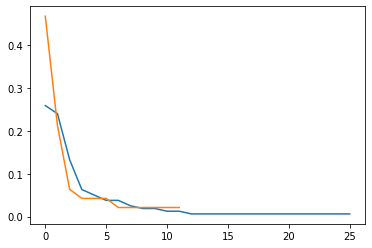

In [87]:
dumdum = course_dept['I50150']
dum2 = course_dept['B53380']

hey = sorted([x/sum(dumdum.values()) for x in dumdum.values()], reverse=True)
hey2 = sorted([x/sum(dum2.values()) for x in dum2.values()], reverse=True)

plt.plot(hey)
plt.plot(hey2)
print(hey)
print(hey2)
print(np.std(hey))
print(np.std(hey2))

In [182]:
perc_courses = {}

for course, depts in course_dept.items():
    l = []
    dept = course[:3]
    for k, v in depts.items():
        v = int(v)
        if v < 5:
            continue
        l.append(v)
        l2 = [x/sum(l) for x in l]
        perc_courses[course]=np.std(l2)


perc_courses = {k: v for k, v in perc_courses.items() if v != 0.0}
perc_courses2 = sorted(perc_courses.items(), key=lambda x:x[1])

top5 = {}
for pair in perc_courses2:
    crsid, perc = pair
    school = crsid[0]
    if school not in top5:
        top5[school] = []
    if len(top5[school]) < 100:
        top5[school].append((crsid, perc))
#print(course_dept['B54290'])
pprint(top5)

{'B': [('B54290', 0.059612099699268735),
       ('B59120', 0.06412384087848938),
       ('B59121', 0.06992246316896181),
       ('B502620', 0.08225066799125157),
       ('B52343', 0.09999999999999998),
       ('B53201', 0.11154424906115508),
       ('B502610', 0.1128194970746759),
       ('B58356', 0.11462216962321126),
       ('B59200A', 0.1174436030055932),
       ('B503610', 0.11904761904761907),
       ('B55370', 0.14259927570852476),
       ('B53200A', 0.15000000000000002),
       ('B52340', 0.16701066428067124),
       ('B66360', 0.17632416690134983),
       ('B53380', 0.1875),
       ('B54370', 0.2142857142857143),
       ('B53100', 0.2409467872326354),
       ('B53321', 0.2692307692307693),
       ('B66461', 0.2727272727272727),
       ('B55377', 0.29033630111290115),
       ('B54470', 0.31818181818181823),
       ('B54471', 0.3225806451612903),
       ('B53450G', 0.3571428571428571),
       ('B52451', 0.4156626506024096),
       ('B52441', 0.437984496124031)],
 'E': [('E81132'

In [184]:
print(course_dept['E81511A'])
print(course_dept['E81132'])
print(course_dept['E81247'])

{'E81': 132, 'L24': 2, 'E35': 11, 'T81': 1, 'B52': 1}
{'L24': 19, 'E35': 28, 'E81': 34, 'L31': 4, 'L11': 6, 'B53': 1, 'L34': 1, 'L41': 3, 'L27': 1, 'L01': 4, 'B50': 2, 'B55': 3, 'L38': 2, 'E37': 2, 'B52': 7, 'L32': 1, 'L07': 1, 'E62': 1}
{'E81': 76, 'E35': 59, 'L11': 8, 'B52': 7, 'L41': 4, 'L24': 22, 'E37': 4, 'B50': 6, 'L38': 2, 'B54': 4, 'L33': 8, 'E44': 3, 'L31': 2, 'L21': 1, 'L04': 1, 'L01': 1, 'L34': 2, 'B53': 3, 'B59': 3, 'L07': 3, 'L32': 1, 'E62': 2, 'B58': 1, 'B55': 1, 'L08': 1}


In [158]:
nx.write_gexf(students_G, "stud.gexf")
nx.write_gexf(students_G50, "stud50.gexf")

In [156]:
len(students_G.nodes())

7981

In [178]:
with open(path) as f:
    print(f.readline())
    for line in f.readlines():
        crsdept,crsno,crssec,ExamCode,ExamDesc,ExamStart,ExamEnd,BlindID = line.strip('\n').split(',')
        crs_id = crsdept + crsno
        if crs_id not in courses:
            courses[crs_id] = []
        courses[crs_id].append(BlindID)
        if BlindID not in people:
            people[BlindID] = {}
        if crsdept not in people[BlindID]:
            people[BlindID][crsdept] = []
        people[BlindID][crsdept].append(crsno)

n_people = {}
n_peoplee = {}
student_data = {}
for pep, depts in people.items():
    cur_max = 0
    summ = 0
    curd = -1
    for d, crs_l in depts.items():
        d = d[0]
        val = sum([int(x[0]) for x in crs_l])
        summ += val
        if val > cur_max:
            cur_max = val
            curd = d
    student_data[pep] = {
        'dept': curd,
        'cur_max': cur_max,
        'perc': cur_max/summ
    }
    if d not in n_people:
        n_people[d] = []
    n_people[d].append(pep)
    if d not in student_data:
        n_peoplee[d] = []
    n_peoplee[d].append(cur_max/summ)
#assign by school
# for k, v in n_people.items():
#     print(' | ', k, ' | ', v, ' | ', round(np.mean(n_peoplee[k]), 3), ' | ')
a = {k: len(v) for k, v in n_people.items()}
for k,v in a.items():
    print('|',k,'|',v,'|')

﻿crsdept,crsno,crssec,ExamCode,ExamDesc,ExamStart,ExamEnd,BlindID

| L | 6080 |
| B | 398 |
| E | 1152 |
| T | 352 |
| I | 1 |


| Deptartment | Classified Students | Actual Students |
| --- | --- | --- |
| Arts & Sciences | 6080 | 4262 |
| Business | 398 | 936 |
| Engineering | 1152 | 1240 |
| Engineering Continuing Studies | 352 | N/A |
| Interdisciplinary | 1 | N/A |
| Design & Visual Arts | N/A | 936 |

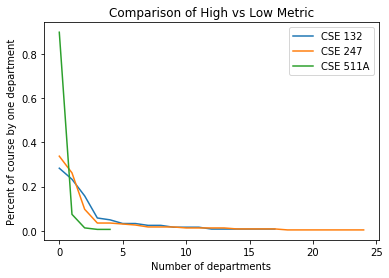

[0.2833333333333333, 0.23333333333333334, 0.15833333333333333, 0.058333333333333334, 0.05, 0.03333333333333333, 0.03333333333333333, 0.025, 0.025, 0.016666666666666666, 0.016666666666666666, 0.016666666666666666, 0.008333333333333333, 0.008333333333333333, 0.008333333333333333, 0.008333333333333333, 0.008333333333333333, 0.008333333333333333]
[0.3377777777777778, 0.26222222222222225, 0.09777777777777778, 0.035555555555555556, 0.035555555555555556, 0.03111111111111111, 0.02666666666666667, 0.017777777777777778, 0.017777777777777778, 0.017777777777777778, 0.013333333333333334, 0.013333333333333334, 0.013333333333333334, 0.013333333333333334, 0.008888888888888889, 0.008888888888888889, 0.008888888888888889, 0.008888888888888889, 0.0044444444444444444, 0.0044444444444444444, 0.0044444444444444444, 0.0044444444444444444, 0.0044444444444444444, 0.0044444444444444444, 0.0044444444444444444]
0.07988224358082448
0.0796833238436088


In [191]:
dumdum = course_dept['E81132']
dum2 = course_dept['E81247']
dum3 = course_dept['E81511A']

hey = sorted([x/sum(dumdum.values()) for x in dumdum.values()], reverse=True)
hey2 = sorted([x/sum(dum2.values()) for x in dum2.values()], reverse=True)
hey3 = sorted([x/sum(dum3.values()) for x in dum3.values()], reverse=True)


plt.figure()
plt.title('Comparison of High vs Low Metric')
plt.xlabel('Number of departments')
plt.ylabel('Percent of course by one department')
plt.plot(hey, label='CSE 132')
plt.plot(hey2, label='CSE 247')
plt.plot(hey3, label='CSE 511A')
plt.legend(loc='upper right')
plt.show()
print(hey)
print(hey2)
print(np.std(hey))
print(np.std(hey2))
